In [177]:
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.optimize as opt


In [178]:
def model(x,e1,e2,w):
    return (e1**2+2*e1*e2*np.cos(w*x)+(e2**2)*(np.cos(w*x)**2))
def refractiveIndex(dm,lamda=632.8e-6,lenght=5.7e-2):
    return(lamda*dm/(2*lenght))

298.8999999999937

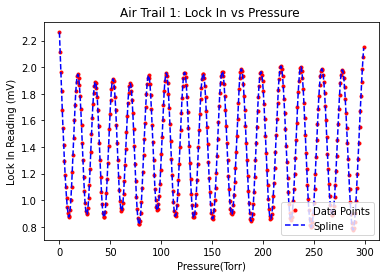

In [179]:
air1=np.loadtxt(open("vacumtoairt1.csv", "rb"), delimiter=",")
air1[1]=savgol_filter(air1[1], 25, 3) *1000
air1[0]=(air1[0]-4)*(.70/.01)
air1spline=inter.InterpolatedUnivariateSpline(air1[0],air1[1])
sigma_y = air1[1] * 0.01
#fitair1=opt.curve_fit(f=model, xdata=air1[0][300::], ydata=air1[1][300::], sigma=sigma_y[300::], absolute_sigma= True, p0=[ 2,6], bounds=(-np.inf, np.inf))

xfine= np.arange(air1[0][0],air1[0][-1],.1)

plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1spline(xfine), 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Air Trail 1: Lock In vs Pressure ")
air1[0][-1]

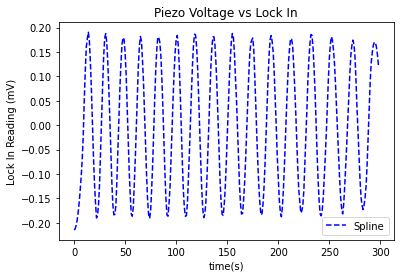

In [180]:
xfine= np.arange(air1[0][0],air1[0][-1])
air1d=air1spline.derivative()
#plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1d(xfine), 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Piezo Voltage vs Lock In")



roots=opt.fsolve(air1d,xfine,)[::]
sortedroots=[]
roots.sort()

for i in range(0,len(roots)-1):
    if roots[i]+1<roots[i+1]:
        sortedroots.append(roots[i])
        
roots=sortedroots[::2]
numberofpeaks=np.arange(1,len(roots)+1)

(array([0.05363353, 1.29791337]),
 array([[ 1.77894642e-07, -2.38882788e-05],
        [-2.38882788e-05,  4.52082259e-03]]),
 0.00029771311340806556,
 array([0.00042178, 0.06723706]),
 2.341224462116497e-06)

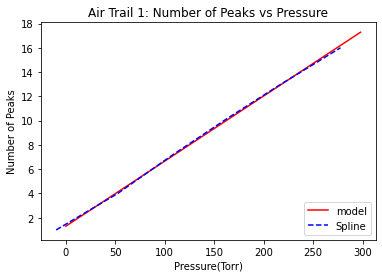

In [181]:



def modelline(x,m,b):
    return (m*x+b)


p,c=opt.curve_fit(f=modelline,xdata=roots,ydata=numberofpeaks,p0=(1,0))
plt.plot(xfine,modelline(xfine,p[0],p[1]),'r',label="model")
plt.plot(roots[::3],numberofpeaks[::3], 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Number of Peaks")
plt.legend(loc=4)
plt.title("Air Trail 1: Number of Peaks vs Pressure")
p,c, refractiveIndex(p[0]), np.sqrt(np.diag(c)),refractiveIndex(np.sqrt(np.diag(c)[0]))

296.8099999999939

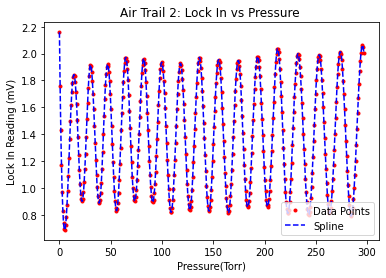

In [182]:
air1=np.loadtxt(open("vacumtoairt2.csv", "rb"), delimiter=",")
air1[1]=savgol_filter(air1[1], 25, 3) *1000
air1[0]=(air1[0]-4)*(.67/.01)
air1spline=inter.InterpolatedUnivariateSpline(air1[0],air1[1])
sigma_y = air1[1] * 0.01
#fitair1=opt.curve_fit(f=model, xdata=air1[0][300::], ydata=air1[1][300::], sigma=sigma_y[300::], absolute_sigma= True, p0=[ 2,6], bounds=(-np.inf, np.inf))

xfine= np.arange(air1[0][0],air1[0][-1],.1)

plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1spline(xfine), 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Air Trail 2: Lock In vs Pressure ")
air1[0][-1]

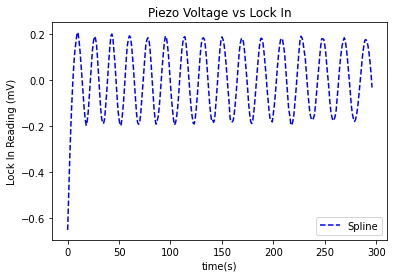

In [183]:
xfine= np.arange(air1[0][0],air1[0][-1])
air1d=air1spline.derivative()
#plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1d(xfine), 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Piezo Voltage vs Lock In")



roots=opt.fsolve(air1d,xfine,)[::]
sortedroots=[]
roots.sort()

for i in range(0,len(roots)-1):
    if roots[i]+1<roots[i+1]:
        sortedroots.append(roots[i])
        
roots=sortedroots[::2]
numberofpeaks=np.arange(1,len(roots)+1)

(array([0.05374649, 0.99851899]),
 array([[ 2.24540219e-07, -3.13394265e-05],
        [-3.13394265e-05,  6.02407921e-03]]),
 0.00029834016623966734,
 array([0.00047386, 0.07761494]),
 array([2.63032062e-06, 4.30831011e-04]))

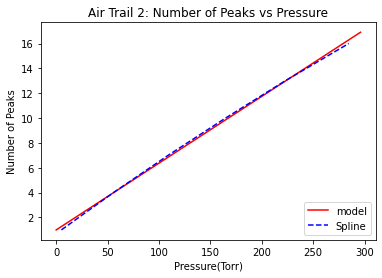

In [184]:



def modelline(x,m,b):
    return (m*x+b)


p,c=opt.curve_fit(f=modelline,xdata=roots,ydata=numberofpeaks,p0=(1,0))
plt.plot(xfine,modelline(xfine,p[0],p[1]),'r',label="model")
plt.plot(roots[::3],numberofpeaks[::3], 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Number of Peaks")
plt.legend(loc=4)
plt.title("Air Trail 2: Number of Peaks vs Pressure")
p,c, refractiveIndex(p[0]),np.sqrt(np.diag(c)),refractiveIndex(np.sqrt(np.diag(c)))

In [185]:
roots

[5.094988616119696,
 22.071285703356633,
 38.722865691569766,
 55.68608081125967,
 73.42712483860922,
 91.01187994118074,
 108.88212109823316,
 127.15075312421047,
 145.82948025406247,
 164.74427788580186,
 183.6554820967476,
 202.9710071508718,
 222.77003174496306,
 243.11237046494105,
 263.484729654577,
 284.5303449757644]

(24.5, 296.44999999999413)

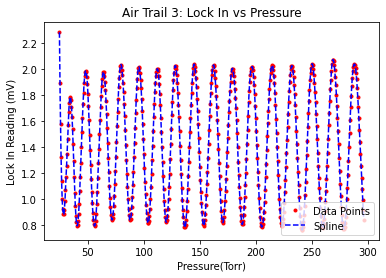

In [186]:
air1=np.loadtxt(open("vacumtoairt3.csv", "rb"), delimiter=",")
air1[1]=savgol_filter(air1[1], 25, 3) *1000
air1[0]=(air1[0]-3.5)*(.49/.01)
air1spline=inter.InterpolatedUnivariateSpline(air1[0],air1[1])
sigma_y = air1[1] * 0.01
#fitair1=opt.curve_fit(f=model, xdata=air1[0][300::], ydata=air1[1][300::], sigma=sigma_y[300::], absolute_sigma= True, p0=[ 2,6], bounds=(-np.inf, np.inf))

xfine= np.arange(air1[0][0],air1[0][-1],.1)

plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1spline(xfine), 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Air Trail 3: Lock In vs Pressure")
air1[0][0],air1[0][-1]

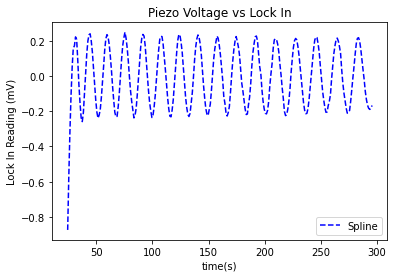

In [187]:
xfine= np.arange(air1[0][0],air1[0][-1])
air1d=air1spline.derivative()
#plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1d(xfine), 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Piezo Voltage vs Lock In")



roots=opt.fsolve(air1d,xfine,)[::]
sortedroots=[]
roots.sort()

for i in range(0,len(roots)-1):
    if roots[i]+1<roots[i+1]:
        sortedroots.append(roots[i])
        
roots=sortedroots[::2]
numberofpeaks=np.arange(1,len(roots)+1)


(array([ 0.0594446, -0.2817377]),
 array([[ 3.06858916e-07, -4.53321961e-05],
        [-4.53321961e-05,  8.53999869e-03]]),
 0.00032996968119735097,
 array([0.00055395, 0.09241211]),
 array([3.07489997e-06, 5.12968292e-04]))

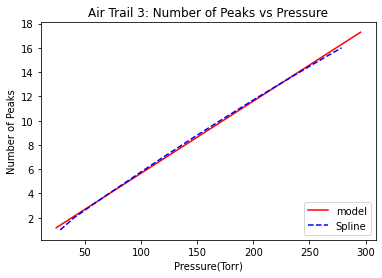

In [188]:


def modelline(x,m,b):
    return (m*x+b)


p,c=opt.curve_fit(f=modelline,xdata=roots,ydata=numberofpeaks,p0=(1,0))
plt.plot(xfine,modelline(xfine,p[0],p[1]),'r',label="model")
plt.plot(roots,numberofpeaks, 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Number of Peaks")
plt.legend(loc=4)
plt.title("Air Trail 3: Number of Peaks vs Pressure")
p,c, refractiveIndex(p[0]),np.sqrt(np.diag(c)),refractiveIndex(np.sqrt(np.diag(c)))

In [189]:
roots

[28.156965088007922,
 40.369044448944784,
 55.88544860446648,
 71.48681220672535,
 87.68793970124113,
 103.71205153647517,
 120.01039616470501,
 136.55966479719336,
 153.38489529451869,
 170.46495323862166,
 187.83819291766747,
 205.29168567854225,
 223.20222140480132,
 241.30195348306097,
 259.7227070513585,
 278.6015091658416]

(30.299999999999983, 299.96999999999395)

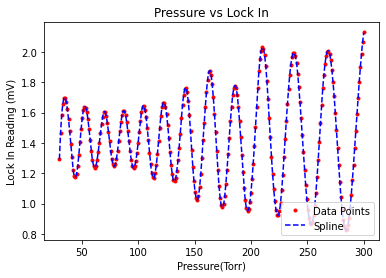

In [190]:
air1=np.loadtxt(open("vacumtohelium1.csv", "rb"), delimiter=",")
air1[1]=savgol_filter(air1[1], 25, 3) *1000
air1[0]=(air1[0]-3.7)*(1.01/.01)
air1spline=inter.InterpolatedUnivariateSpline(air1[0],air1[1])
sigma_y = air1[1] * 0.01
#fitair1=opt.curve_fit(f=model, xdata=air1[0][300::], ydata=air1[1][300::], sigma=sigma_y[300::], absolute_sigma= True, p0=[ 2,6], bounds=(-np.inf, np.inf))

xfine= np.arange(air1[0][0],air1[0][-1],.1)

plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1spline(xfine), 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Pressure vs Lock In")
air1[0][0],air1[0][-1]

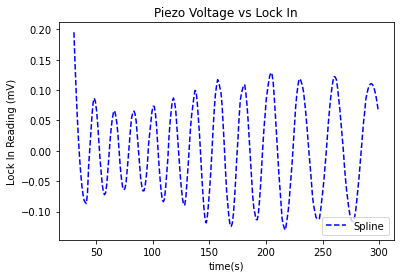

In [191]:
xfine= np.arange(air1[0][0],air1[0][-1])
air1d=air1spline.derivative()
#plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1d(xfine), 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Piezo Voltage vs Lock In")



roots=opt.fsolve(air1d,xfine,)[::]
sortedroots=[]
roots.sort()

for i in range(0,len(roots)-1):
    if roots[i]+1<roots[i+1]:
        sortedroots.append(roots[i])
        
roots=sortedroots[::2]
numberofpeaks=np.arange(1,len(roots)+1)

(array([ 0.04799   , -0.22163435]),
 array([[ 2.21467529e-06, -3.10194608e-04],
        [-3.10194608e-04,  5.47971627e-02]]),
 0.00026638657229955266)

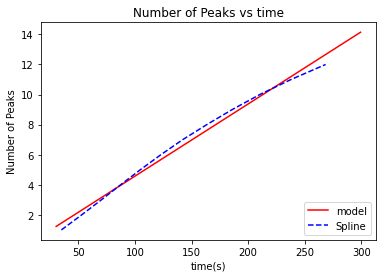

In [192]:

def modelline(x,m,b):
    return (m*x+b)


p,c=opt.curve_fit(f=modelline,xdata=roots,ydata=numberofpeaks,p0=(1,0))
plt.plot(xfine,modelline(xfine,p[0],p[1]),'r',label="model")
plt.plot(roots,numberofpeaks, 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Number of Peaks")
plt.legend(loc=4)
plt.title("Number of Peaks vs time")
p,c, refractiveIndex(p[0])

(34.0, 297.1599999999932)

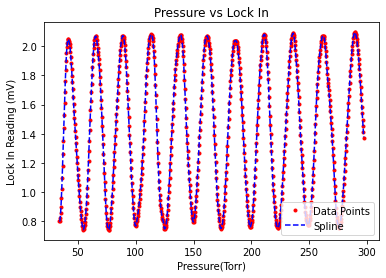

In [193]:
air1=np.loadtxt(open("vacumtohelium2.csv", "rb"), delimiter=",")
air1[1]=savgol_filter(air1[1], 25, 3) *1000
air1[0]=(air1[0]-3)*(.34/.01)
air1spline=inter.InterpolatedUnivariateSpline(air1[0],air1[1])
sigma_y = air1[1] * 0.01
#fitair1=opt.curve_fit(f=model, xdata=air1[0][300::], ydata=air1[1][300::], sigma=sigma_y[300::], absolute_sigma= True, p0=[ 2,6], bounds=(-np.inf, np.inf))

xfine= np.arange(air1[0][0],air1[0][-1],.1)

plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1spline(xfine), 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Pressure vs Lock In")
air1[0][0],air1[0][-1]

c:\users\robin james\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


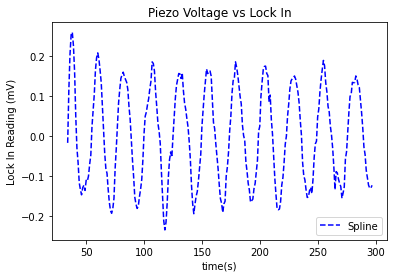

In [194]:
xfine= np.arange(air1[0][0],air1[0][-1])
air1d=air1spline.derivative()
#plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1d(xfine), 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Piezo Voltage vs Lock In")



roots=opt.fsolve(air1d,xfine,)[::]
sortedroots=[]
roots.sort()

for i in range(0,len(roots)-1):
    if roots[i]+1<roots[i+1]:
        sortedroots.append(roots[i])
        
roots=sortedroots[::2]
numberofpeaks=np.arange(1,len(roots)+1)

(array([ 0.07862407, -1.74065743]),
 array([[ 2.70455753e-06, -4.38260701e-04],
        [-4.38260701e-04,  8.69277438e-02]]),
 0.00043643257090968134)

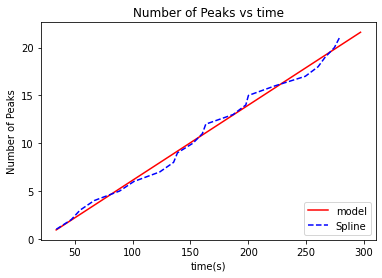

In [195]:

def modelline(x,m,b):
    return (m*x+b)


p,c=opt.curve_fit(f=modelline,xdata=roots,ydata=numberofpeaks,p0=(1,0))
plt.plot(xfine,modelline(xfine,p[0],p[1]),'r',label="model")
plt.plot(roots,numberofpeaks, 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Number of Peaks")
plt.legend(loc=4)
plt.title("Number of Peaks vs time")
p,c, refractiveIndex(p[0])

(28.000000000000004, 300.99999999999443)

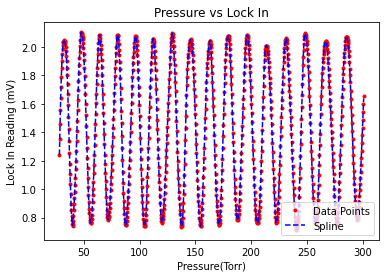

In [196]:
air1=np.loadtxt(open("vacumtohelium3.csv", "rb"), delimiter=",")
air1[1]=savgol_filter(air1[1], 25, 3) *1000
air1[0]=(air1[0]-3)*(.28/.01)
air1spline=inter.InterpolatedUnivariateSpline(air1[0],air1[1])
sigma_y = air1[1] * 0.01
#fitair1=opt.curve_fit(f=model, xdata=air1[0][300::], ydata=air1[1][300::], sigma=sigma_y[300::], absolute_sigma= True, p0=[ 2,6], bounds=(-np.inf, np.inf))

xfine= np.arange(air1[0][0],air1[0][-1],.1)

plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1spline(xfine), 'b--',label="Spline")
plt.xlabel("Pressure(Torr)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Pressure vs Lock In")
air1[0][0],air1[0][-1]

c:\users\robin james\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


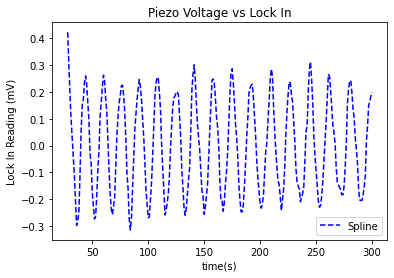

In [197]:
xfine= np.arange(air1[0][0],air1[0][-1])
air1d=air1spline.derivative()
#plt.plot(air1[0],air1[1], 'r.', label="Data Points")
plt.plot(xfine,air1d(xfine), 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Lock In Reading (mV)")
plt.legend(loc=4)
plt.title("Piezo Voltage vs Lock In")



roots=opt.fsolve(air1d,xfine,)[::]
sortedroots=[]
roots.sort()

for i in range(0,len(roots)-1):
    if roots[i]+1<roots[i+1]:
        sortedroots.append(roots[i])
        
roots=sortedroots[::2]
numberofpeaks=np.arange(1,len(roots)+1)

(array([ 0.05933523, -0.75204391]),
 array([[ 1.17493580e-07, -1.83205778e-05],
        [-1.83205778e-05,  3.56553171e-03]]),
 0.0003293625990407294)

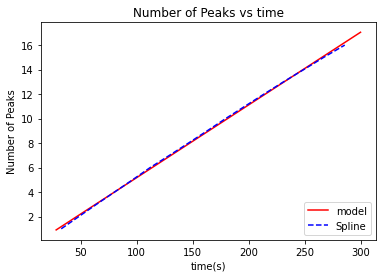

In [198]:

def modelline(x,m,b):
    return (m*x+b)


p,c=opt.curve_fit(f=modelline,xdata=roots,ydata=numberofpeaks,p0=(1,0))
plt.plot(xfine,modelline(xfine,p[0],p[1]),'r',label="model")
plt.plot(roots,numberofpeaks, 'b--',label="Spline")
plt.xlabel("time(s)")
#plt.errorbar(air1[0],air1[1],yerr=sigma_y)
plt.ylabel("Number of Peaks")
plt.legend(loc=4)
plt.title("Number of Peaks vs time")
p,c, refractiveIndex(p[0])